In [79]:
#comparing deep and shallow networks in TF

In [80]:
# import fashion mnist images
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


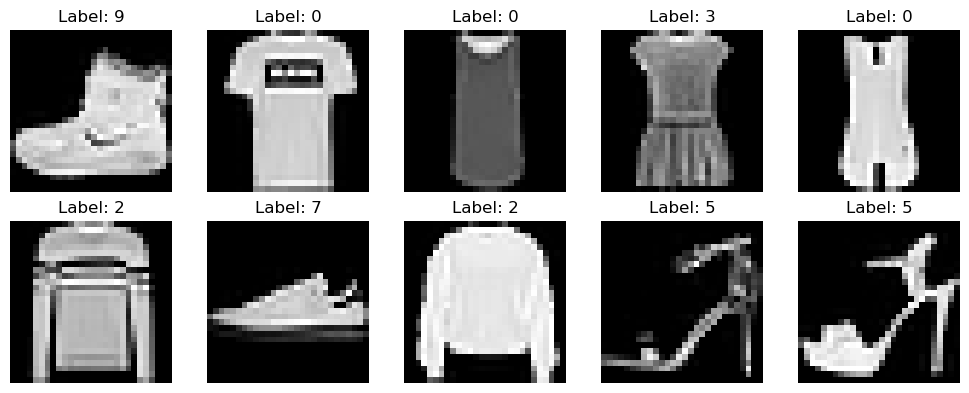

In [81]:
#Let's look at what is in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
for i in range(10):  # Displaying the first 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [82]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [83]:
#train_images

In [84]:
# the default mode expects RGB images in 256 bits, we use greyscale, so let's expand the images to match the expectations of the model
import numpy as np
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [85]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [86]:
# by default, the mnist set has 10 categories (labes = 0 to 9)
# It is easier to train if we convert (one hot encoding) each of them to a vector of dimension 10
# e.g. convert [0,0,0,0,0,0,0,1,0,0,0] to [0,0],[0,0],...[1,0],[0,1],..
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [87]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
# defining the model: a sequenctial, dense NN, with 1D input of 28x28,
#392 neurons for one relu layer, 10 categories out after softmax max probability function

from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(392, activation='relu'),
    Dense(10, activation='softmax')
])


In [89]:
#Now let's compile, we use Adam to train backward prop (popular algo for that purpose,
# loss as difference between the true labels and the predicted probabilities, 10 epochs
import time
start_time = time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

elapsed_time = time.time() - start_time
print(f"Training took {elapsed_time:.2f} seconds")

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4834 - accuracy: 0.8264 - val_loss: 0.4128 - val_accuracy: 0.8508
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3619 - accuracy: 0.8682 - val_loss: 0.3848 - val_accuracy: 0.8578
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3249 - accuracy: 0.8812 - val_loss: 0.3988 - val_accuracy: 0.8567
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3011 - accuracy: 0.8877 - val_loss: 0.3960 - val_accuracy: 0.8512
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8948 - val_loss: 0.3457 - val_accuracy: 0.8804
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9010 - val_loss: 0.3291 - val_accuracy: 0.8814
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2536 - accuracy: 0.9055 - val_loss: 0.3383 - val_accuracy:

In [90]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Plotting the Accuracy Curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plotting the Loss Curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Assuming you've trained your model as 'history'
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Now, plot the curves
# plot_learning_curve(history)


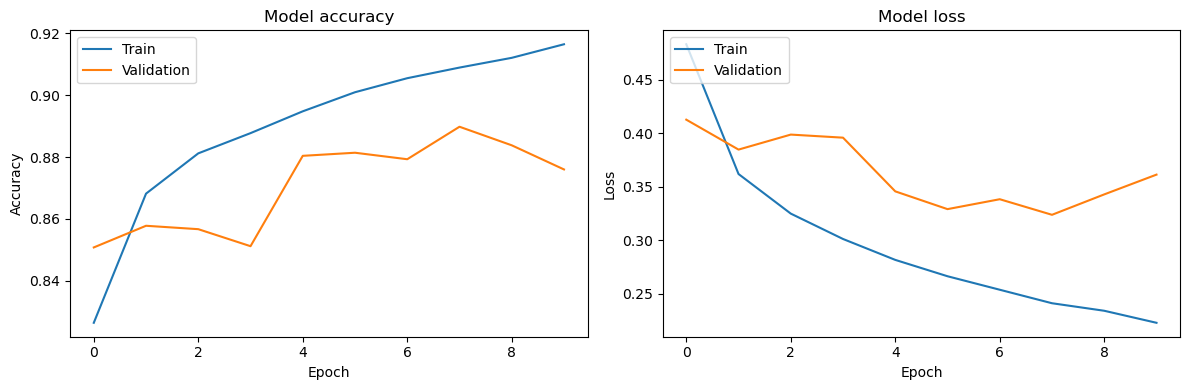

In [91]:
plot_learning_curve(history1)

In [92]:
# now let's try a multi layer model instead, 2 layers
model_deep = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(392, activation='relu'),
    Dense(392, activation='relu'),
    Dense(10, activation='softmax')
])


In [93]:
import time
start_time = time.time()

model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_deep.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

elapsed_time = time.time() - start_time
print(f"Training took {elapsed_time:.2f} seconds")

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8310 - val_loss: 0.4024 - val_accuracy: 0.8554
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8690 - val_loss: 0.3774 - val_accuracy: 0.8608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3206 - accuracy: 0.8814 - val_loss: 0.3626 - val_accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8890 - val_loss: 0.3562 - val_accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.8949 - val_loss: 0.3449 - val_accuracy: 0.8766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.8995 - val_loss: 0.3348 - val_accuracy: 0.8768
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9046 - val_loss: 0.3375 - val_accuracy:

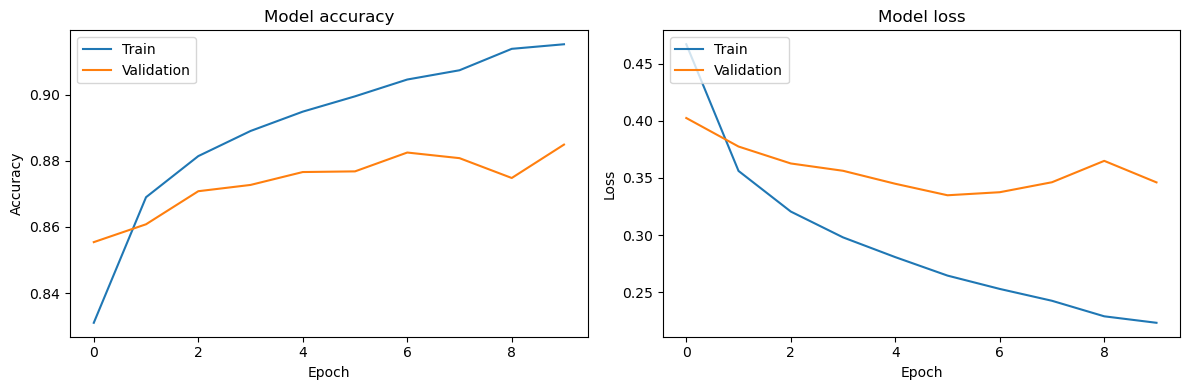

In [94]:
#Let's plot the multi layer model
plot_learning_curve(history2)

In [95]:
#Let's compare performances, first by the numbers
# For the single-layer model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Single-layer model accuracy:', test_acc)

# For the multi-layer model
test_loss_deep, test_acc_deep = model_deep.evaluate(test_images, test_labels)
print('Multi-layer model accuracy:', test_acc_deep)

313/313 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8760
Single-layer model accuracy: 0.8759999871253967
313/313 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8849
Multi-layer model accuracy: 0.8848999738693237


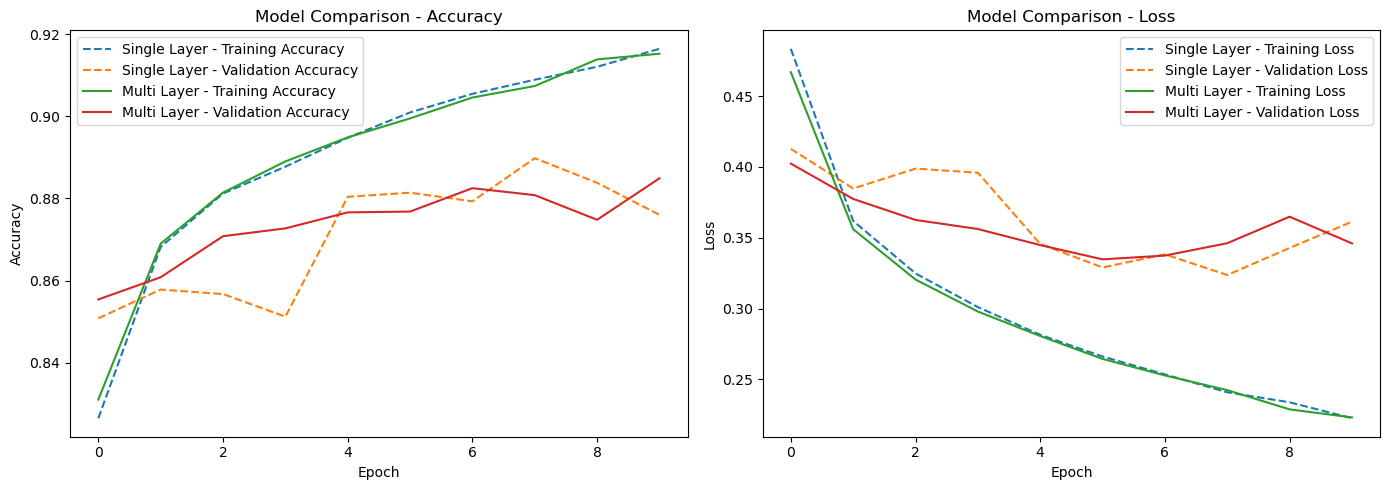

In [96]:
# Now let's plot them side by side, and see that in this particular case,
# having multiple layers does not bring much
import matplotlib.pyplot as plt

def plot_comparison(history1, history2, title):
    plt.figure(figsize=(14, 5))

    # Plotting the Accuracy Curve
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Single Layer - Training Accuracy', linestyle='--')
    plt.plot(history1.history['val_accuracy'], label='Single Layer - Validation Accuracy', linestyle='--')
    plt.plot(history2.history['accuracy'], label='Multi Layer - Training Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Multi Layer - Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting the Loss Curve
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Single Layer - Training Loss', linestyle='--')
    plt.plot(history1.history['val_loss'], label='Single Layer - Validation Loss', linestyle='--')
    plt.plot(history2.history['loss'], label='Multi Layer - Training Loss')
    plt.plot(history2.history['val_loss'], label='Multi Layer - Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_comparison(history1, history2, 'Model Comparison')


In [97]:
#Now that the best model is found, we can save it to h5 format:
model.save('my_model.h5') #we save 'model', because 'model_deep' was not better


In [98]:
# We can load the model back with:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')


In [99]:
#Exporting for tflite
import tensorflow as tf
#model = tf.keras.models.load_model('path_to_your_model.h5') # if the model was not already loaded
# Initialize the TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()



INFO:tensorflow:Assets written to: /var/folders/24/4xzytrxn76jb3gxp4dplrtd40000gp/T/tmpjapjas3k/assets


2023-08-29 00:45:24.705899: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-08-29 00:45:24.706320: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-08-29 00:45:24.719035: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/24/4xzytrxn76jb3gxp4dplrtd40000gp/T/tmpjapjas3k
2023-08-29 00:45:24.726436: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-08-29 00:45:24.726599: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/24/4xzytrxn76jb3gxp4dplrtd40000gp/T/tmpjapjas3k
2023-08-29 00:45:24.731868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-08-29 00:45:24.733623: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-08-29 00:45:24.844743: I tensorflow/cc/saved_model/loader.

In [100]:
# Save model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
